## Project: Making Business Decisions Based on Data

**Project description**
<br>
**Context**
<br>
You are an analyst at a big online store. Together with the marketing department, you've compiled a list of hypotheses that may help boost revenue.
You need to prioritize these hypotheses, launch an A/B test, and analyze the results.
<br>
  **Description of the data**
<br>
Data used in the first part of the project:
<br>
**/datasets/hypotheses_us.csv**

- **Hypotheses** — brief descriptions of the hypotheses
- **Reach** — user reach, on a scale of one to ten
- **Impact** — impact on users, on a scale of one to ten
- **Confidence** — confidence in the hypothesis, on a scale of one to ten
- **Effort** — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.
<br>


 Data used in the second part of the project:
 <br>
 **/datasets/orders_us.csv**


   - **transactionId** — order identifier
   - **visitorId** — identifier of the user who placed the order
   - **date** — of the order
   - **revenue** — from the order
   - **group** — the A/B test group that the user belongs to

**/datasets/visits_us.csv**

   - **date** — date
   - **group** — A/B test group
   - **visits** — the number of visits on the date specified in the A/B test group specified
<br>


**Make sure to preprocess the data.**

<br> 
There might be mistakes in the original datasets; for example, some of the visitors might have gotten into both group A and group B.


 <br>
 
 **Part 1. Prioritizing Hypotheses**
<br> 
The file hypotheses_us.csv contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each.
The task is to:

   - **Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.**
   - **Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.**
   - **Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.**

**Part 2. A/B Test Analysis**
 <br>
You carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv.
Task
Analyze the A/B test:

   - **Graph cumulative revenue by group. Make conclusions and conjectures.**
   - **Graph cumulative average order size by group. Make conclusions and conjectures.**
   - **Graph the relative difference in cumulative average order size for group B compared with group A.** 
   - **Make conclusions and conjectures.**
   - **Calculate each group's conversion rate as the ratio of orders to the number of visits for each day.** 
   - **Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.**
   - **Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.**
   - **Calculate the 95th and 99th percentiles for the number of orders per user.** 
   - **Define the point at which a data point becomes an anomaly.**
   - **Plot a scatter chart of order prices. Make conclusions and conjectures.**
   - **Calculate the 95th and 99th percentiles of order prices.** 
   - **Define the point at which a data point becomes an anomaly.**
   - **Find the statistical significance of the difference in conversion between the groups using the raw data.**
   - **Make conclusions and conjectures.**
   - **Find the statistical significance of the difference in average order size between the groups using the raw data.**
   - **Make conclusions and conjectures.**
   - **Find the statistical significance of the difference in conversion between the groups using the filtered data**.
   - **Make conclusions and conjectures.**
   - **Find the statistical significance of the difference in average order size between the groups using the filtered data.**
   - **Make conclusions and conjectures.**
   - **Make a decision based on the test results.**
   - **The possible decisions are:**
<br>
   
   

   **1.** Stop the test, consider one of the groups the leader.
   <br>
  
   **2.** Stop the test, conclude that there is no difference between the groups.
   <br>

   **3.** Continue the test.
<br>

 **How will my project be assessed?**
Your project will be assessed on these criteria. Read over them carefully before you start the project.
Here’s what project reviewers look for when assessing your project:

  - **How you prepare the data for analysis**
  - **How you prioritize hypotheses**
  - **How you interpret the resulting graphs**
  - **How you calculate statistical significance**
  - **What conclusions you draw based on the A/B test results**
  - **Whether you follow the project structure and keep the code tidy**
  - **The conclusions you make**
  - **Whether you leave comments at each step**

In [1]:
!pip install sidetable

In [2]:
#!pip install jupyter-dash

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import sidetable
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import statistics
import scipy.stats as stats


**Make sure to preprocess the data:**

In [4]:
try:
    hypotheses = pd.read_csv('hypotheses_us.csv', sep = ";")
    orders = pd.read_csv('orders_us.csv')
    visits = pd.read_csv('visits_us.csv')
    
except:
    hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep = ";")
    orders = pd.read_csv('/datasets/orders_us.csv')
    visits = pd.read_csv('/datasets/visits_us.csv')
    

In [5]:
hypotheses.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [6]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [8]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
orders['date']=pd.to_datetime(orders['date'],dayfirst=True)

In [10]:
visits['date']=pd.to_datetime(visits['date'],dayfirst=True)

Changing the datatype in **'date'** column from **object** to **datetime**

In [11]:
hypotheses = hypotheses.rename(columns=str.lower)
pd.set_option('display.max_colwidth',400)

**Converting the hypoteses datadet`s column names to lowcase**

In [12]:
hypotheses.head()

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1


**Now we can cee all the 'hypothsise' column writings**

**Deleting users observed in both groups:**

In [13]:
orders_a = orders.query('group == "A"')
orders_b = orders.query('group == "B"')


In [14]:
both_groups = pd.merge(orders_a ,orders_b, how = 'inner', on = ['visitorId'] )
print('Nomber of users observed in both groups: ', pd.Series(len(both_groups)))

Nomber of users observed in both groups:  0    183
dtype: int64


In [15]:
both_groups.sample()

,transactionId_x,visitorId,date_x,revenue_x,group_x,transactionId_y,date_y,revenue_y,group_y
134,3925488023,3984495233,2019-08-04,315.1,A,3532704780,2019-08-03,315.1,B


In [16]:
bad_list = both_groups['visitorId']

In [17]:
full_orders = orders.copy()
orders = orders[-orders['visitorId'].isin(bad_list)]

In [18]:
full_orders.info()
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object 

**We can cee that 183 users they are in both groups, so we decided to remove them to be able to perform accurate calculations**

In [19]:
orders.duplicated().sum()

0

In [20]:
visits.duplicated().sum()

0

In [21]:
hypotheses.duplicated().sum()

0

- **Applying the ICE framework to prioritize hypotheses. Sorting them in descending order of priority.**

**ICE = (Impact * confidence)/ effort**

In [22]:
hypotheses['ICE'] = ( hypotheses['impact'] * hypotheses['confidence'])/hypotheses['effort']
hypotheses[['hypothesis', 'ICE']].sort_values(by ='ICE' , ascending = False)

,hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


- **Applying the RICE framework to prioritize hypotheses. Sorting them in descending order of priority.**

**RICE has four components:**
<br>    
**Reach** — how many users will be affected by the update you want to introduce
<br> 
**Impact** — how strongly this update will affect the users, their experience, and their satisfaction with the product
<br> 
**Confidence** — how sure you are that your product will affect them in this way
<br> 
**Effort** — how much will it cost to test the hypothesis
<br> 


**RICE = (reach * impact * confidence)/ effort**

In [23]:
hypotheses['RICE'] = ( hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence'])/hypotheses['effort']
print(hypotheses[['hypothesis', 'RICE']].sort_values(by ='RICE' , ascending = False))

                                                                                                               hypothesis  \
7                                Add a subscription form to all the main pages. This will help you compile a mailing list   
2          Add product recommendation blocks to the store's site. This will increase conversion and average purchase size   
0                                             Add two new channels for attracting traffic. This will bring 30% more users   
6                                 Show banners with current offers and sales on the main page. This will boost conversion   
8                                                        Launch a promotion that gives users discounts on their birthdays   
3  Change the category structure. This will increase conversion since users will find the products they want more quickly   
1                                                       Launch your own delivery service. This will shorten delivery time   


 - **Showing how the prioritization of hypotheses changes when you use RICE instead of ICE.**

**We can cee that entire order have changed then we used RICE instead ISE, because we added 'reach' variable into our calcualations. Top 5 categories the same in both list, but the order is different. Only hypothes nomber 4 is on the last place in both lists. For our task as online store we should take RISE because it gives us both 'reach' and 'impact' factor alltogether and more flexability in our investigations.**

In [24]:
hypotheses

,hypothesis,reach,impact,confidence,effort,ICE,RICE
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2


**Part 2. A/B Test Analysis**

- **Graphing cumulative revenue by group. Make conclusions and conjectures.**

In [25]:
revenue_by_group = pd.pivot_table(orders, values = 'revenue', index = 'date', columns = 'group', aggfunc = np.sum )

In [26]:
revenue_by_group.sample()

group,A,B
date,,
2019-08-07,1942.0,3435.6


In [27]:
cumulative_rev_by_group = revenue_by_group.cumsum()

In [28]:
cumulative_rev_by_group.sample()

group,A,B
date,,
2019-08-09,13734.0,18428.8


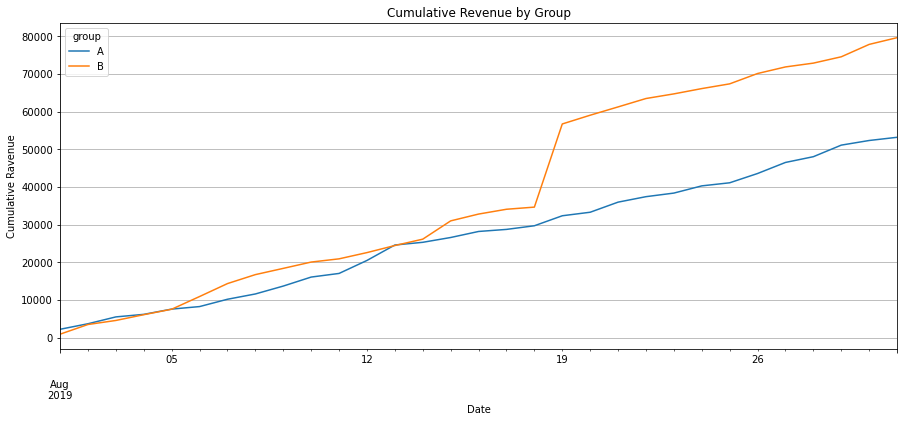

In [29]:
plt.rcParams["figure.figsize"] = (15,6)

cumulative_rev_by_group.plot()
plt.grid()
plt.title('Cumulative Revenue by Group')
plt.xlabel('Date')
plt.ylabel('Cumulative Ravenue')
plt.show()

**We can cee that cumulative revenue metrics of group A low than thous of group B. Group B groving much harder in second part of the test(after 18.09.2019)**

- **Graphing cumulative average order size by group. Make conclusions and conjectures.**

In [30]:
orders_ = orders.copy()
visits_ = visits.copy()


In [31]:
orders_.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [32]:
visits_.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [33]:
doubles_list = list(orders_.groupby(['visitorId'])['group'].nunique().reset_index().query('group > 1')['visitorId'])

In [34]:
orders_ = orders_[-orders_['visitorId'].isin(doubles_list)]

In [35]:
orders_a = orders_.query('group == "A"')
orders_b = orders_.query('group == "B"')
visits_a = visits_.query('group == "A"')
visits_b = visits_.query('group == "B"')

In [36]:
orders_a_rev = orders_a.groupby(['date'])['revenue'].sum().cumsum()
orders_b_rev = orders_b.groupby(['date'])['revenue'].sum().cumsum()

In [37]:
orders_a_size = orders_a.groupby(['date'])['transactionId'].sum().cumsum()
orders_b_size = orders_b.groupby(['date'])['transactionId'].sum().cumsum()

In [38]:
avg_orders_a = orders_a_rev / orders_a_size
avg_orders_b = orders_b_rev / orders_b_size

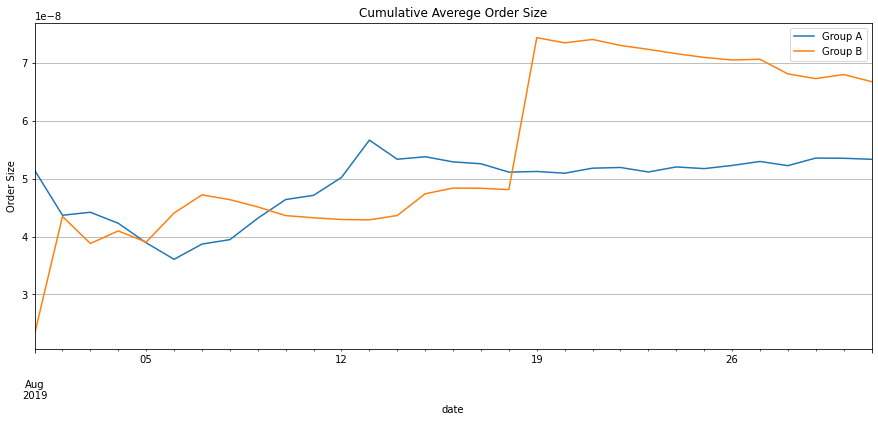

In [39]:
plt.rcParams["figure.figsize"] = (15,6)
plt.title('Cumulative Averege Order Size')
avg_orders_a.plot(label = 'Group A')
avg_orders_b.plot(label = 'Group B')
plt.grid(axis='y')
plt.ylabel('Order Size')
plt.legend()
plt.show()

**We can cee that Cumulative Averege Order Size for group B is much more higher in the second part of the test as well.**

 - **Graphing the relative difference in cumulative average order size for group B compared with group A.**

In [40]:
rel_diff = (avg_orders_b / avg_orders_a) - 1

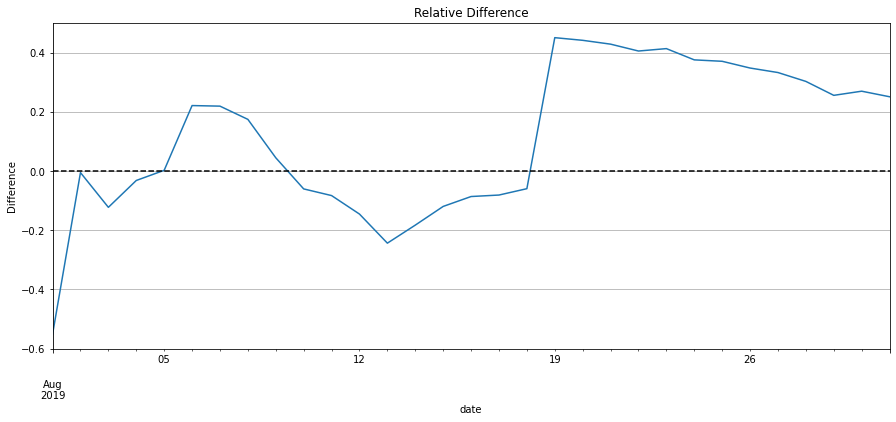

In [41]:
plt.rcParams["figure.figsize"] = (15,6)

plt.title('Relative Difference')
rel_diff.plot(x = 'date')
plt.ylabel('Difference')
plt.axhline(y = 0, color= 'black', linestyle = '--')
plt.grid()
plt.show()

**We can cee that Relative Difference hase changed from A to B in the first part of the test but after 18.09.2019 it`s on the B side.**

 - **Calculating each group's conversion rate as the ratio of orders to the number of visits for each day.**

In [42]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [43]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [44]:
visits_by_group = pd.pivot_table(visits, values = 'visits', index = 'date', columns = 'group', aggfunc = np.sum)


In [45]:
visits_by_group = pd.DataFrame(visits_by_group.to_records())

In [46]:
orders_by_group = pd.pivot_table(orders, values = "transactionId", index = "date", columns = "group", aggfunc = 'count')

In [47]:
orders_by_group = pd.DataFrame(orders_by_group.to_records())

In [48]:
orders_by_group.head()

,date,A,B
0,2019-08-01,23,17
1,2019-08-02,19,23
2,2019-08-03,24,14
3,2019-08-04,11,14
4,2019-08-05,22,21


In [49]:
visits_by_group.head()

,date,A,B
0,2019-08-01,719,713
1,2019-08-02,619,581
2,2019-08-03,507,509
3,2019-08-04,717,770
4,2019-08-05,756,707


In [50]:
conversion_a = orders_by_group['A'] / visits_by_group['A']
conversion_b = orders_by_group['B'] / visits_by_group['B']

In [51]:
dates =  visits_by_group['date']

In [52]:
conversion_a.head() 

0    0.031989
1    0.030695
2    0.047337
3    0.015342
4    0.029101
Name: A, dtype: float64

In [53]:
conversion_b.head()

0    0.023843
1    0.039587
2    0.027505
3    0.018182
4    0.029703
Name: B, dtype: float64

In [54]:
print(statistics.mean(conversion_a))

0.025890306958716497


In [55]:
print(statistics.mean(conversion_b))

0.03042400280520272


**We can cee that averege conversion rate conversion rate for group B is slightly bigger than for group A.**

**Calculating cumulative conversion:**

 - **Ploting the daily conversion rates of the two groups and describe the difference. Drawing conclusions and making conjectures.**

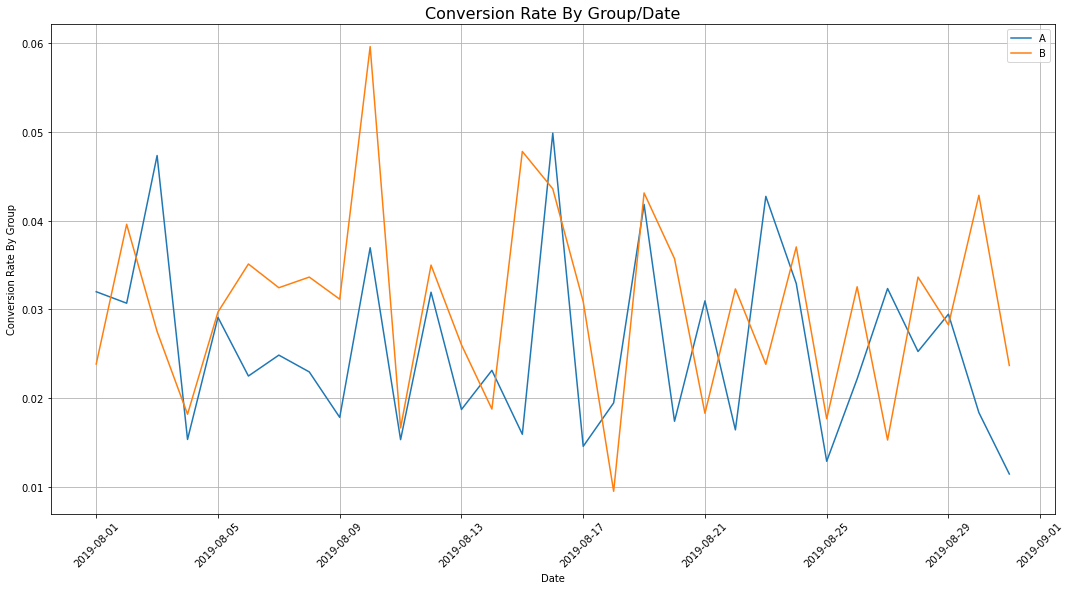

In [56]:
plt.rcParams["figure.figsize"] = (18,9)
conversion_a_cum = conversion_a.cumsum()
conversion_b_cum = conversion_b.cumsum()
plt.plot(dates, conversion_a, label='A')
plt.plot(dates, conversion_b, label='B')
plt.legend()
plt.grid()
plt.title('Conversion Rate By Group/Date',fontsize=16)
plt.xlabel('Date')
plt.ylabel('Conversion Rate By Group')
plt.xticks(rotation=45)
plt.show()

**Here we can`t cee big difference between two groups**

**Calculating cumulative conversion:**

In [57]:
conversion_a_cum = conversion_a.cumsum()
conversion_b_cum = conversion_b.cumsum()

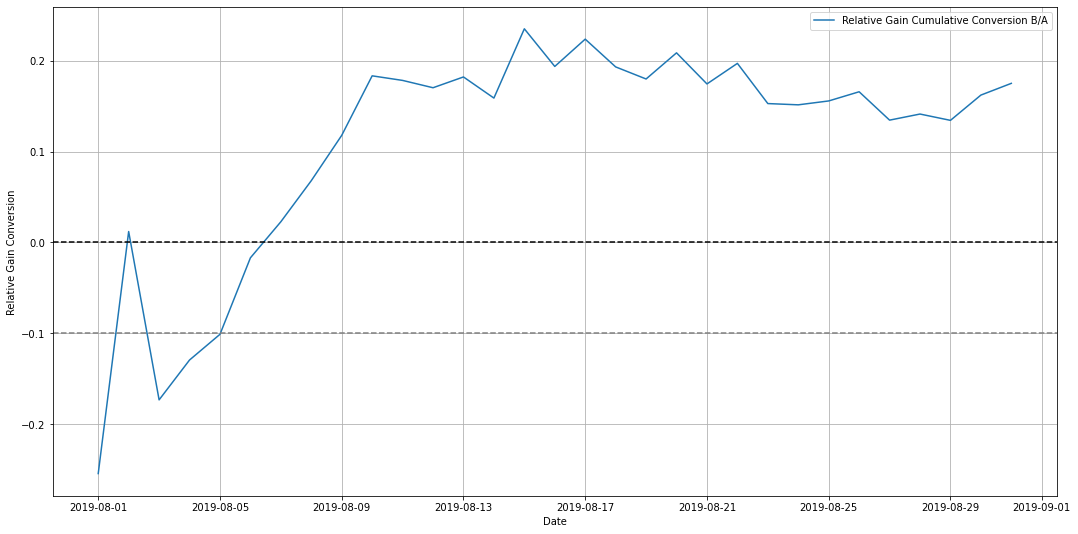

In [58]:
plt.rcParams["figure.figsize"] = (18,9)
plt.plot(dates, conversion_b_cum / conversion_a_cum - 1, label = 'Relative Gain Cumulative Conversion B/A' )
plt.legend()
plt.grid()
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.axhline(y = -0.1, color = 'gray', linestyle = '--')
plt.xlabel('Date')
plt.ylabel('Relative Gain Conversion')
plt.show()

**We can cee that group B leading above group A Relative Gein of Cumulative Conversion** 

- **Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.**


In [59]:
order_user_a = orders_a.groupby(['visitorId'])['transactionId'].count()
order_user_b = orders_b.groupby(['visitorId'])['transactionId'].count()

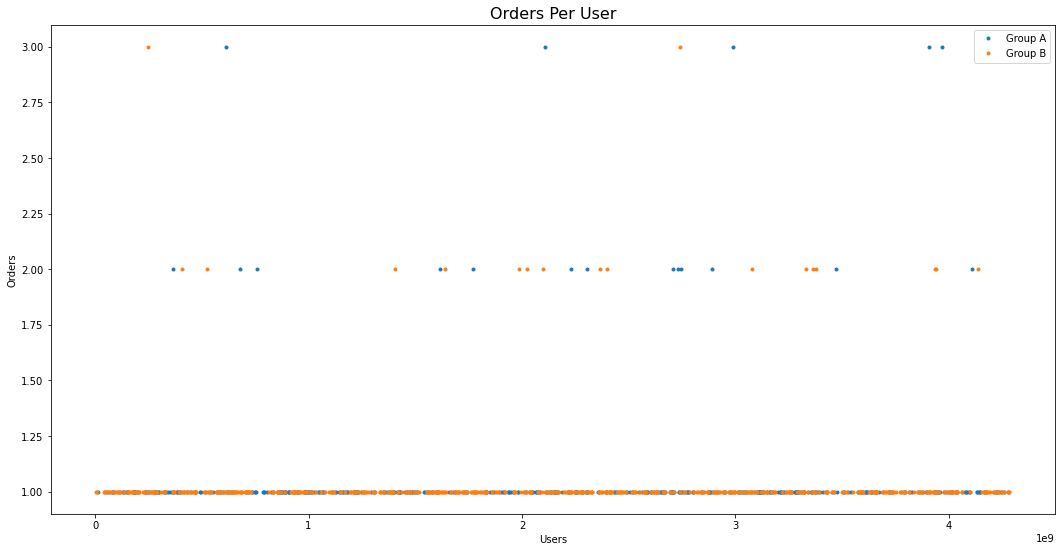

In [60]:
plt.rcParams["figure.figsize"] = (18,9)
plt.title('Orders Per User',fontsize=16)
order_user_a.plot(style='.', label = 'Group A')
order_user_b.plot(style='.', label = 'Group B')
plt.xlabel('Users')
plt.ylabel('Orders')
plt.legend()
plt.show()


- **Calculating the 95th and 99th percentiles for the number of orders per user.** 

In [61]:
orders_by_users = orders.drop(['group','revenue','date'],axis=1).groupby('visitorId', as_index=False).agg({'transactionId':["count"]})
orders_by_users.columns = ['visitorId','orders']
orders_by_users.head()

,visitorId,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


In [62]:
print('Persentiles: 90, 95, 99 :', np.percentile(orders_by_users['orders'], [90, 95, 99]))

Persentiles: 90, 95, 99 : [1. 1. 2.]


- **Define the point at which a data point becomes an anomaly.**

**Most of users have only one order, only one persent of users have 2 orders ore more. It becomes an anomaly than user have 2 orders ore more.**

- **Plot a scatter chart of order prices. Make conclusions and conjectures.**

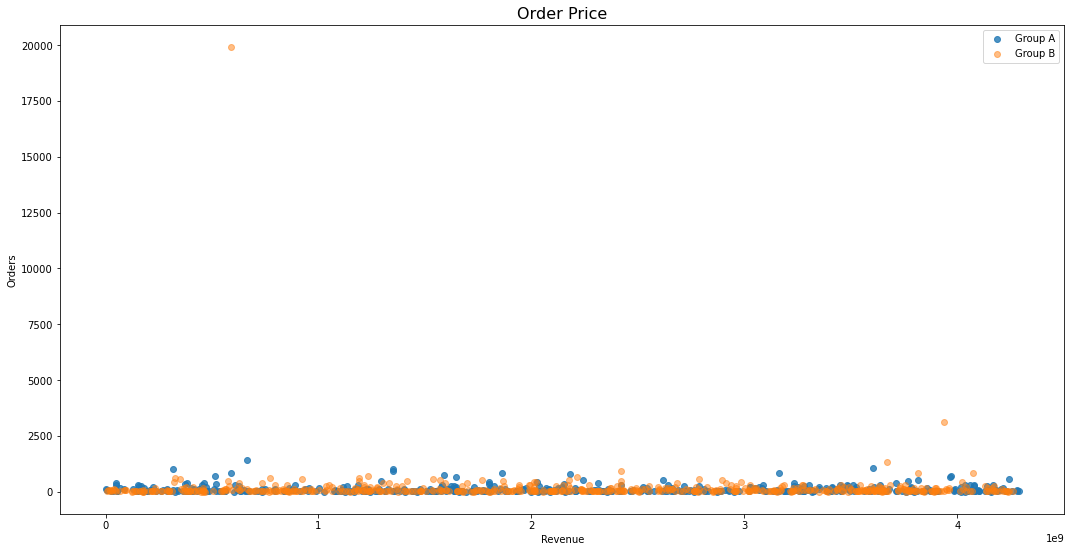

In [63]:
plt.rcParams["figure.figsize"] = (18,9)
plt.title('Order Price',fontsize=16)
plt.scatter(orders_a['transactionId'],orders_a['revenue'], label = 'Group A', alpha = 0.8)
plt.scatter(orders_b['transactionId'],orders_b['revenue'], label = 'Group B', alpha = 0.5)
plt.xlabel('Revenue')
plt.ylabel('Orders')
#plt.ylim(1,2000)
plt.legend()
plt.show()

**Here we can cee all the data with anomalies**

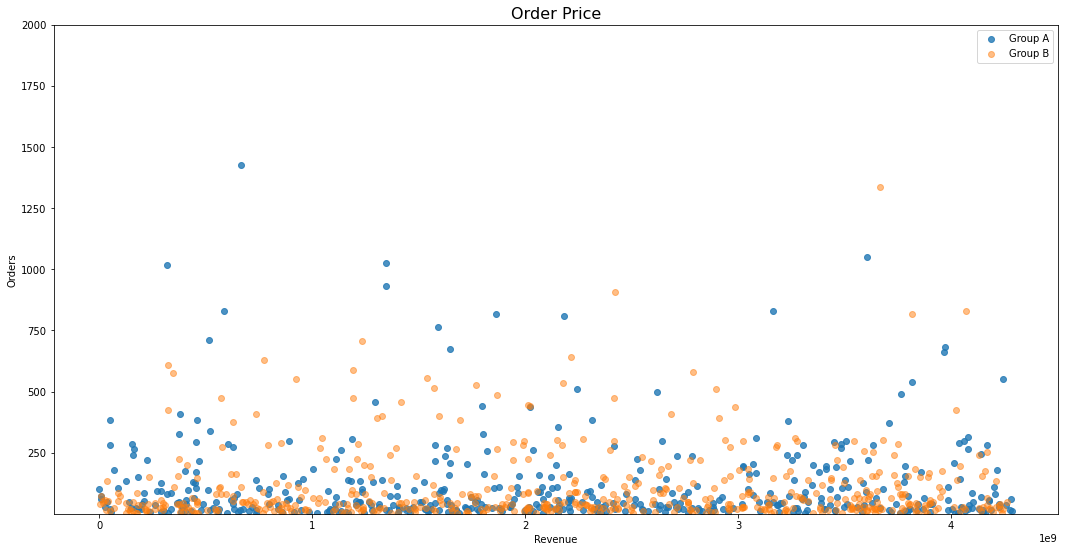

In [64]:
plt.rcParams["figure.figsize"] = (18,9)
plt.title('Order Price',fontsize=16)
plt.scatter(orders_a['transactionId'],orders_a['revenue'], label = 'Group A', alpha = 0.8)
plt.scatter(orders_b['transactionId'],orders_b['revenue'], label = 'Group B', alpha = 0.5)
plt.xlabel('Revenue')
plt.ylabel('Orders')
plt.ylim(1,2000)
plt.legend()
plt.show()

**In this scatter plot we can cee more information about orders but we can`t cee the anomalies**

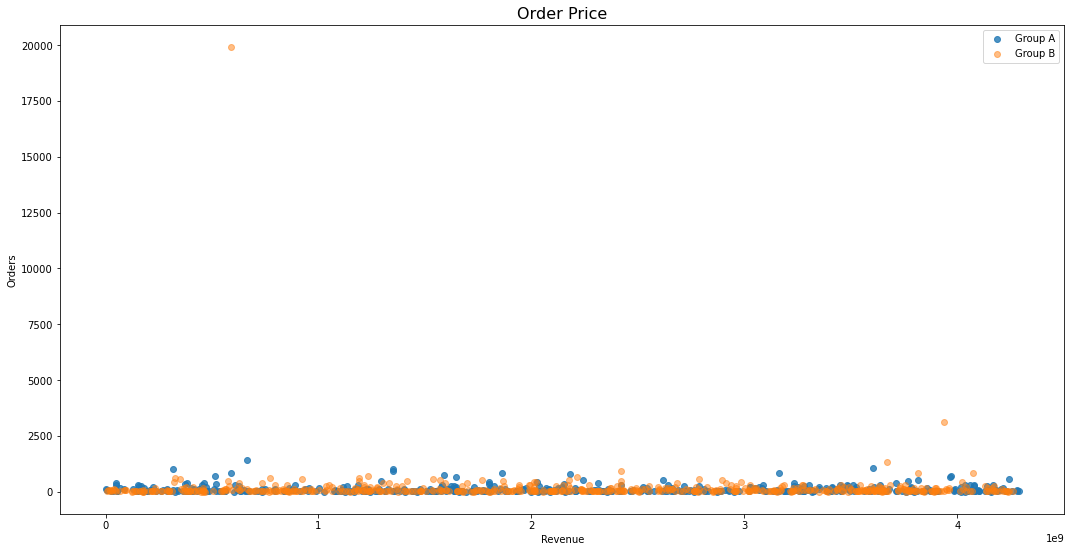

In [65]:
# the reviewer's cell:
plt.rcParams["figure.figsize"] = (18,9)
plt.title('Order Price',fontsize=16)
plt.scatter(orders_a['transactionId'],orders_a['revenue'], label = 'Group A', alpha = 0.8)
plt.scatter(orders_b['transactionId'],orders_b['revenue'], label = 'Group B', alpha = 0.5)
plt.xlabel('Revenue')
plt.ylabel('Orders')
plt.legend()
plt.show()

 - **Calculating the 95th and 99th percentiles of order prices.**

In [66]:
print('Persentiles: 90, 95, 99 :', np.percentile(orders['revenue'], [90, 95, 99]))

Persentiles: 90, 95, 99 : [280.8   414.275 830.3  ]


In [67]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


- **Define the point at which a data point becomes an anomaly.**

**Most of our observations have ravenu lower than 280.8, wich means that only 10% have more than that. Omly 1% have more than 830.3(it`s an anomaly). We should find way for averege order to bring more ravenu**

 - **Find the statistical significance of the difference in conversion between the groups using the raw data.**

**H0: Averege Conversion Rate are equal for both groups.**
<br>
**H1: Averege Conversion Rate are NOT equal for both groups.**

In [68]:
alpha = .05

In [69]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'transactionId']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'transactionId']

In [70]:
sampleA = pd.concat([ordersByUsersA['transactionId'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['transactionId'])), name='transactionId')],axis=0)

sampleB = pd.concat([ordersByUsersB['transactionId'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['transactionId'])), name='transactionId')],axis=0)

In [71]:
result = stats.mannwhitneyu(sampleA, sampleB)[1]


print('p-value: ',"{0:.3f}".format(result))
print('Relative gein: ',"{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))
print('alpa = ',alpha)

p-value:  0.011
Relative gein:  0.160
alpa =  0.05


In [72]:
if(result < alpha):
    print('p-value < alpha : We  Reject H0')
else:
    print('p-value > alpha : Fail to Reject H0')

p-value < alpha : We  Reject H0


**So we reject H0: the groups are not the same. We can cee that Relative Gein is 16% to group B side. So group B shows better resolts with RAW data.**

- **Find the statistical significance of the difference in average order size between the groups using the raw data.**

**H0: Averege order sizes are equal for both groups.**
<br>
**H1: Averege order sizes are NOT equal for both groups.**

In [73]:
print('Significance of Difference: ','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

Significance of Difference:  0.278


In [74]:
result = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

In [75]:
print('p-value: ''{0:.3f}'.format(result))
print('alpa = ',alpha)

p-value: 0.862
alpa =  0.05


In [76]:
if(result < alpha):
    print('p-value < alpha : We  Reject H0')
else:
    print('p-value > alpha : Fail to Reject H0')

p-value > alpha : Fail to Reject H0


**Here we can`t regect the H0 that averege order sizes are equal for both groups, but we can cee that group B bigger in 28% from group B.**

- **Find the statistical significance of the difference in conversion between the groups using the filtered data**.

**Here we have to remove all the anomalies we have recorded in previous steps:**

**Users that have more than 1 order are anomaly**

In [77]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['transactionId'] > 1]['visitorId'], ordersByUsersB[ordersByUsersB['transactionId'] > 1]['visitorId']], axis = 0)

**Users that have more than 414.275 revenue are anomaly**

In [78]:
usersWithExpensiveOrders = orders[orders['revenue'] > 414.275]['visitorId']

In [79]:
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()



In [80]:
print(abnormalUsers.head())
print(abnormalUsers.shape) 

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitorId, dtype: int64
(86,)


In [81]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['transactionId'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['transactionId'])),name='transactionId')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['transactionId'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['transactionId'])),name='transactionId')],axis=0)

In [82]:
result = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]

In [83]:
print('p-value: ',"{0:.3f}".format(result))
print('alpa = ',alpha)
print('Relative Gain: ',"{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


p-value:  0.016
alpa =  0.05
Relative Gain:  0.174


In [84]:
if(result < alpha):
    print('p-value < alpha : We  Reject H0')
else:
    print('p-value > alpha : Fail to Reject H0')

p-value < alpha : We  Reject H0


**Old Results:
<br>
p-value:  0.011
<br>
Relative gein:  0.160**


**Here with FILTERED data we have very close resolts to test with RAW data.**

- **Find the statistical significance of the difference in average order size between the groups using the filtered data.**

In [85]:
result = stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]

In [86]:
print('p-value: ','{0:.3f}'.format(result))
print('alpa = ',alpha)

print('Significance of Difference: ','{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

p-value:  0.771
alpa =  0.05
Significance of Difference:  -0.033


In [87]:
if(result < alpha):
    print('p-value < alpha : We  Reject H0')
else:
    print('p-value > alpha : Fail to Reject H0')

p-value > alpha : Fail to Reject H0


**In this test we can cee that group A is better in 3% then group B**

**Old Results:
<br>
p-value: 0.862
<br>
Significance of Difference:  0.278**    

   - **The possible decisions are:**
<br>
   
   

   **1.** Stop the test, consider one of the groups the leader.
   <br>
  
   **2.** Stop the test, conclude that there is no difference between the groups.
   <br>

   **3.** Continue the test.

### Stop the test, consideing  the group B the leader.
**In most of tastes and investigetions the group B shows best resolts then group A**

### Conclusion:

#### Make sure to preprocess the data:

<br>

We separeted our data to columns using **(sep = ";")**
<br>

Changed the datatype in **'date'** column from **object** to **datetime**
<br>

Converted the hypoteses dataset column names to **lowcase**
<br>

Deleted users observed in both groups: we can cee that **183 users they are in both groups**, so we decided to **remove them to be able to perform accurate calculations**
<br>
We have checjked our data for **duplicates**.There are **NONE duplicates** in our data.

### Prioritizing Hypotheses

- **Applying the ICE framework to prioritize hypotheses.**
- **Applying the RICE framework to prioritize hypotheses.**

We can cee that **entire order have changed** then we used **RICE** instead **ICE**, because we added **'reach'** variable into our calcualations. Top 5 categories are the same in both list, but the order is different. **Only hypothes nomber 4** is on the last place in both lists. **For our task as online store we should take RISE** because it gives us **both 'reach' and 'impact' factor alltogether and more flexability in our investigations**.

### A/B Test Analysis

**Graphing cumulative revenue by group. Make conclusions and conjectures:**
<br>
**We can cee that cumulative revenue metrics of group A low than thous of group B. Group B groving much harder in second part of the test(after 18.09.2019)**

**Graphing cumulative average order size by group. Make conclusions and conjectures:**
<br>
**We can cee that Cumulative Averege Order Size for group B is much more higher in the second part of the test as well.**

**Graphing the relative difference in cumulative average order size for group B compared with group A.**

**Calculating each group's conversion rate as the ratio of orders to the number of visits for each day:** 
<br>
**We can cee that averege conversion rate conversion rate for group B is slightly bigger than for group A.**

**Ploting the daily conversion rates of the two groups and describe the difference. Drawing conclusions and making conjectures:**
<br>
**Here we can`t cee big difference between two groups**

**Calculating cumulative conversion:**
<br>
**We can cee that group B leading above group A Relative Gein of Cumulative Conversion** 

**Plot a scatter chart of the number of orders per user. Make conclusions and conjectures:**
<br>
**Most of users have only one order, only one persent of users have 2 orders ore more. It becomes an anomaly than user have 2 orders ore more.**

**Plot a scatter chart of order prices. Make conclusions and conjectures.**
<br>
**Most of our observations have ravenu lower than 280.8, wich means that only 10% have more than that. Omly 1% have more than 830.3(it`s an anomaly). We should find way for averege order to bring more ravenu**

**Find the statistical significance of the difference in conversion between the groups using the RAW data.**
<br>
**Relative gein:  0.160**
<br>
**p-value:  0.011**
<br>
**We reject the null hypotesys.**
<br>
**So we reject H0: the groups are not the same. We can cee that Relative Gein is 16% to group B side. So group B shows better resolts with RAW data.**

**Find the statistical significance of the difference in average order size between the groups using the RAW data.**
<br>
**Significance of Difference:  0.278**
<br>
**p-value: 0.862**
<br>
**We can`t reject the null hypotesys.**
<br>
**Here we can`t regect the H0 that averege order sizes are equal for both groups, but we can cee that group B bigger in 28% from group B.**

**Find the statistical significance of the difference in conversion between the groups using the FILTERED data**.
<br>
**Here we have to remove all the anomalies we have recorded in previous steps:**
<br>
**Users that have more than 1 order are anomaly**
<br>
**Users that have more than 414.275 revenue are anomaly**
<br>
**p-value:  0.016**
<br>
**Relative Gain:  0.174**
<br>
**We reject the null hypotesys.**
<br>
**Here with FILTERED data we have very close resolts to test with RAW data.**

**Find the statistical significance of the difference in average order size between the groups using the FILTERED data.**
<br>
**p-value:  0.771**
<br>
**Significance of Difference:  -0.033**
<br>
**We can`t reject the null hypotesys.**
**In this test we can cee that group A is better in 3% then group B**

- **Make a decision based on the test results:**

### Stop the test, consideing  the group B the leader.
**In most of tastes and investigetions the group B shows best resolts then group A**